In [5]:
# Clone project folder from GitHub
# !git clone https://github.com/data-analytics-professionals/tweet-classification.git

Cloning into 'tweet-classification'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 26 (delta 16), reused 5 (delta 1), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [6]:
# import pandas, alias as pd
import pandas as pd

# connect with train.csv and store in df
df = pd.read_csv("/content/tweet-classification/data/train.csv")

In [7]:
# check data within df
df.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [8]:
# check shape of df
df.shape

(7613, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


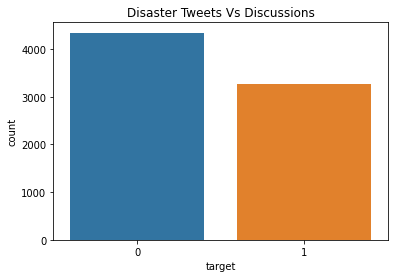

In [9]:
# pyplot as plt from matplotlib
import matplotlib.pyplot as plt

# import seaborn with an alias sns
import seaborn as sns

sns.countplot('target', data=df)
plt.title('Disaster Tweets Vs Discussions')
plt.show()

In [10]:
# Return counts of unique values within target.
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

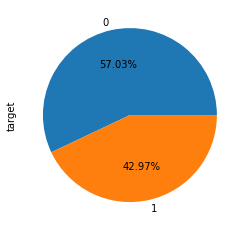

In [11]:
# Generate a pie plot for target feature.
df['target'].value_counts().plot.pie(autopct='%1.2f%%')

In [12]:
# Number of Characters Distribution in Tweets 

In [13]:
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-iitki7k5
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-iitki7k5
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp36-none-any.whl size=11742 sha256=f569e9d900513a6b030aa026a64c2269839404aed1c40afc2678ef51f79c310a
  Stored in directory: /tmp/pip-ephem-wheel-cache-9ol5v5ks/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie
  Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [15]:
import preprocess_kgptalkie as kgp
df = kgp.get_basic_features(df)
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


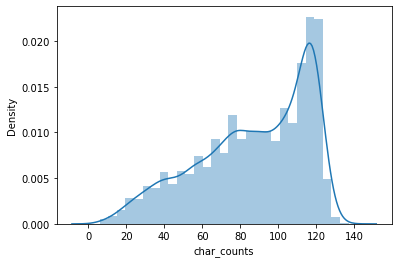

In [16]:
# Plot density distributio of a char_counts
sns.distplot(df['char_counts'])

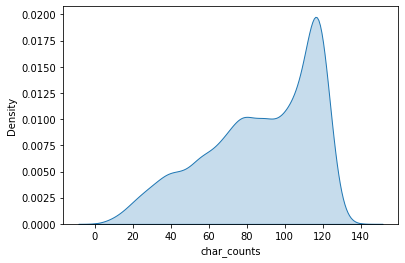

In [19]:
# Kernel Density Estimate (KDE) Plot for char_counts
sns.kdeplot(df['char_counts'], shade=True)

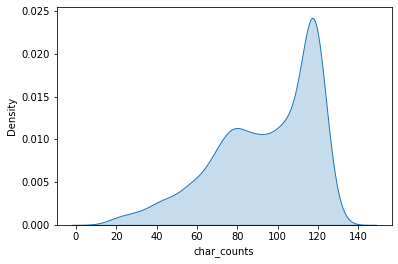

In [20]:
# Kernel Density Estimate (KDE) Plot for char_counts where target == 1
sns.kdeplot(df[df['target'] == 1]['char_counts'], shade=True)

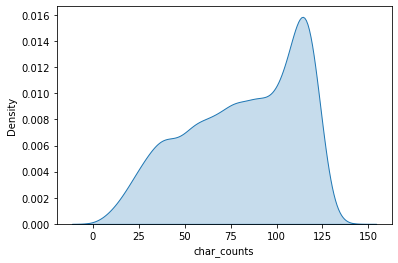

In [21]:
# Kernel Density Estimate (KDE) Plot for char_counts where target == 0
sns.kdeplot(df[df['target'] == 0]['char_counts'], shade=True)